## cargar dataset de documentos

In [48]:
pip install nltk -q

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import nltk
import numpy as np
# corpus de nltk para 'tokenizer' y 'stopwords'
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
file_path= 'data/df_curated_videos_youtube.csv'
df_documentos =  pd.read_csv(file_path, sep = ';')
df_documentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   chanel_name        3288 non-null   object 
 1   video_id           3288 non-null   object 
 2   source             3288 non-null   object 
 3   publish_date       3288 non-null   object 
 4   duration           3288 non-null   float64
 5   last_update_date   3288 non-null   object 
 6   title              3288 non-null   object 
 7   text               3288 non-null   object 
 8   year               3288 non-null   int64  
 9   numero_tokens      3288 non-null   int64  
 10  numero_caracteres  3288 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 282.7+ KB


In [51]:
df_documentos.head()

,chanel_name,video_id,source,publish_date,duration,last_update_date,title,text,year,numero_tokens,numero_caracteres
0,ARENA ALFA,I1PG0G4Ix7w,https://www.youtube.com/watch?v=I1PG0G4Ix7w,2014-09-22,241.0,2024-06-01,analisis tecnico bancolombia $cib 09 sep 14,analisis tecnico bancolombia $cib 09 sep 14. m...,2014,946,3579
1,ARENA ALFA,uRnB41tY8RA,https://www.youtube.com/watch?v=uRnB41tY8RA,2014-09-22,172.0,2024-06-01,video analisis tecnico avianca 05 sept 14,video analisis tecnico avianca 05 sept 14. bue...,2014,621,2449
2,ARENA ALFA,kG30gkmkEZM,https://www.youtube.com/watch?v=kG30gkmkEZM,2014-09-09,136.0,2024-06-01,video analisis canacol 04 sept 14,video analisis canacol 04 sept 14. señores muy...,2014,547,2167
3,ARENA ALFA,6uGldYqdh9Q,https://www.youtube.com/watch?v=6uGldYqdh9Q,2014-09-03,99.0,2024-06-01,analisis tecnico ecopetrol 03-sept-14,analisis tecnico ecopetrol 03-sept-14. señores...,2014,378,1472
4,ARENA ALFA,ds8BFU1HmtY,https://www.youtube.com/watch?v=ds8BFU1HmtY,2019-10-24,230.0,2024-06-01,vocabulario bursatil - como hablan los trader...,vocabulario bursatil - como hablan los traders...,2019,826,3422


In [52]:
df_documentos['text'].values

array(['analisis tecnico bancolombia $cib 09 sep 14. muy buenos días vamos a hacer un análisis breve de la situación de bancolombia el día de ayer habíamos comentado perdón y al twitter privado que la grafica bancolombia y desde ahí ve en eeuu estaba en palabras mías horrible estaba rompiendo a la baja un hombro cabeza hombro se desmonten twitter este fue el tweet es el hombro cabeza hombro esta fue la ruptura se los advertimos cuando estaba 61 33 igual ya les había comentado que yo venía corto es de 64 dólares les había comentado el corto lo pueden encontrar también en la cuenta de twitter ahí está la señal de corto que les envié cuando abrí mi corto personal y ese corto nos cerramos hoy en 59 95 con una rentabilidad del 6.7 por ciento ya es la tercera el tercer trade que les he comentado como cuestión personal no en bancolombia sino en si ve que hemos hecho en eeuu todos positivos razón para decirlo en eeuu es que no tenemos ese efecto del dólar que como les había comentado el dólar 

In [53]:
lista_dfs_consulta = []
df = df_documentos[['video_id','chanel_name','text','year']]
df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(str(row['text'])), axis=1)

C:\Users\felip\AppData\Local\Temp\ipykernel_21488\2081353031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(str(row['text'])), axis=1)


## preprocesamiento de textos

In [54]:
def unir_tokens_from_lista(lista_tokens:list)->list:
    all_tokens = []
    for t in lista_tokens:
        all_tokens.extend(t)
    print("all_tokens_title =",len(all_tokens))
    return all_tokens 

In [55]:
def analisis_grafico(all_tokens:list,palabras_top:int=10):
    # analisis de frecuencia en palabras 
    fdist = nltk.FreqDist(all_tokens)
    print('Size BoW=',len(fdist))
    topwords = fdist.most_common(palabras_top)
    x,y = zip(*topwords)
    plt.figure(figsize=(15,10))
    plt.bar(x,y)
    plt.xticks(rotation=90)
    plt.show()
    return x

all_tokens_title = 17079901
Size BoW= 110170


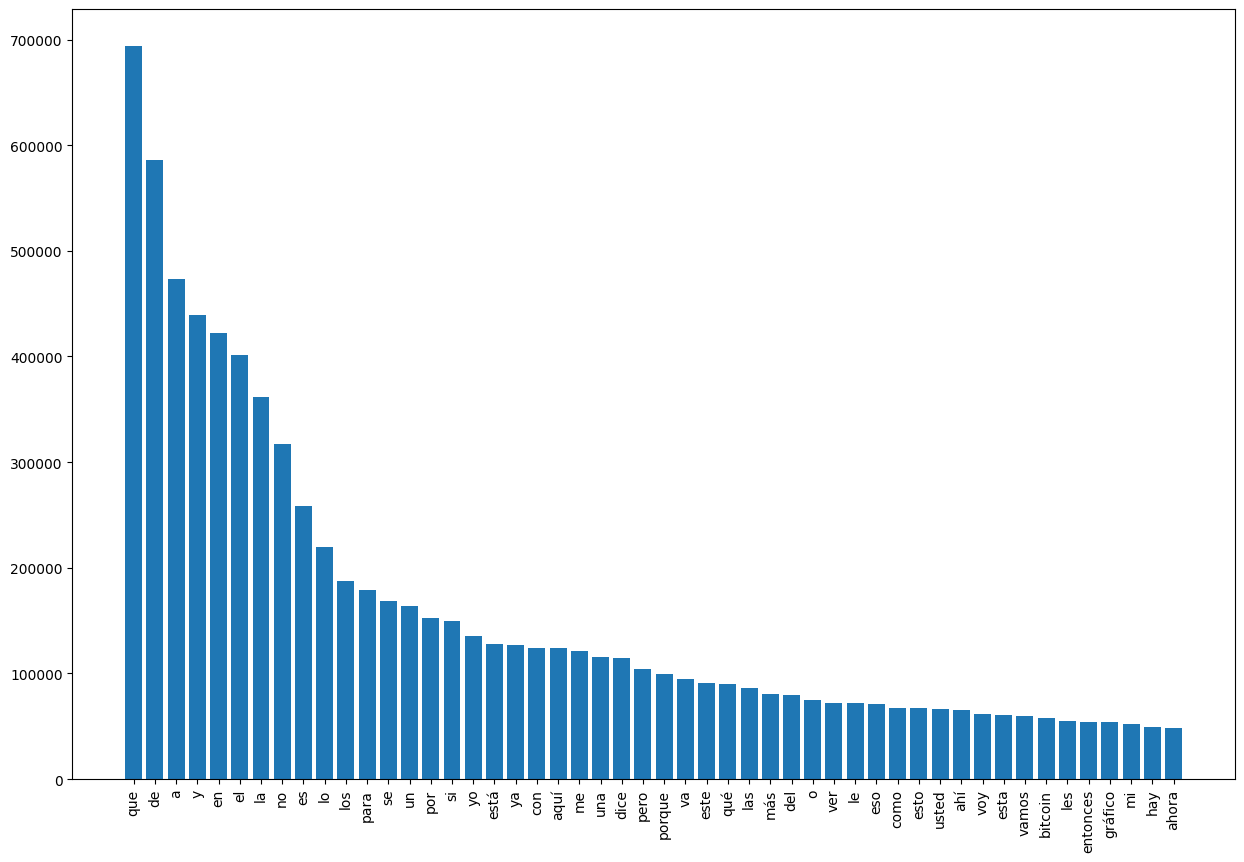

In [56]:
lista_tokens=df['tokenized_text']
BoW = unir_tokens_from_lista(lista_tokens)
_ = analisis_grafico(BoW,50)


### preprocesamiento inicial y elimininacion de stop words

In [57]:
from nltk.corpus import stopwords
def quitar_tildes(s):  
    s = re.sub(r'[áàä]', 'a', s)  
    s = re.sub(r'[éèë]', 'e', s)  
    s = re.sub(r'[íìï]', 'i', s)  
    s = re.sub(r'[óòö]', 'o', s)  
    s = re.sub(r'[úùü]', 'u', s)  
    return s  

def preprocesamiento_and_stopwords(all_tokens):
    stop_words_nltk = set(stopwords.words('spanish'))
    prepro_tokens = [quitar_tildes(w) for w in all_tokens]
    prepro_tokens = [w.lower() for w in prepro_tokens]  
    prepro_tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in prepro_tokens]
    prepro_tokens = [w for w in prepro_tokens if w not in stop_words_nltk]
    prepro_tokens = [w for w in prepro_tokens if w.isalpha()]
    prepro_tokens = [w for w in prepro_tokens if len(w)>2]
    return prepro_tokens

Size BoW= 88518


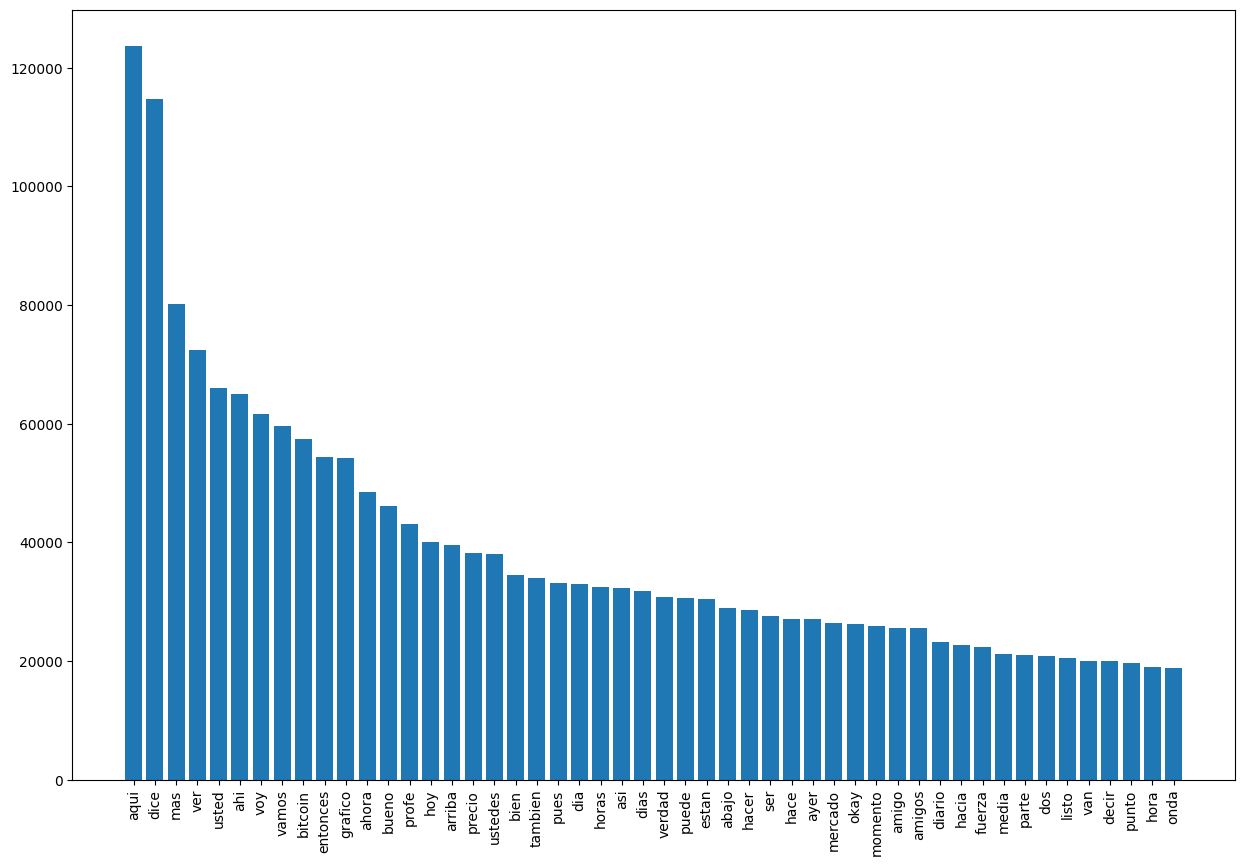

In [58]:
prepro_tokens = preprocesamiento_and_stopwords(BoW)
_ = analisis_grafico(prepro_tokens,50)

### lematizacion y stemmer

In [59]:
#Lemmatization y stemmer

from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer

def preprocesamiento_lematizacion_stemming(tokens):
    lancaster = LancasterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()

    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
    #prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="n") for w in prepro_tokens ]
    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="a") for w in prepro_tokens ]
    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="s") for w in prepro_tokens ]
    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="r") for w in prepro_tokens ]

    prepro_tokens = [lancaster.stem(w) for w in prepro_tokens]
    prepro_tokens = [w for w in prepro_tokens if len(w)>2]

    return prepro_tokens


Size BoW= 60788


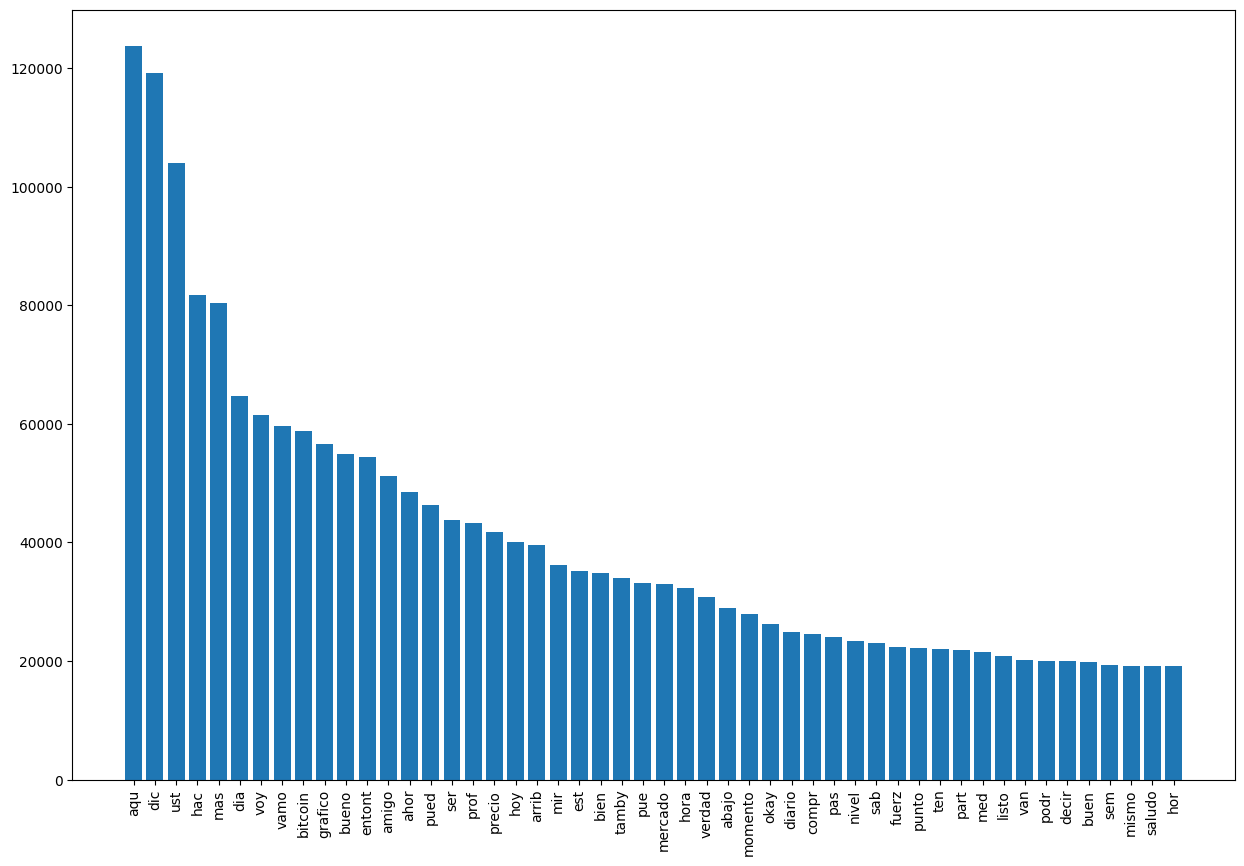

In [60]:
prepro_tokens = preprocesamiento_lematizacion_stemming(prepro_tokens)
BoW_prep = analisis_grafico(prepro_tokens,50)

## Aplicar todo el preprocesamiento a cada canal

In [61]:
# Agrupar por video_id
grouped_channel_df = df.groupby(['chanel_name','year']).agg({
    'text': ' '.join,
    'video_id': 'count',
    'tokenized_text': lambda x: sum(x, [])
}).reset_index()

# Renombrar columnas si es necesario
#grouped_channel_df.rename(columns={'id': 'id_count'}, inplace=True)

grouped_channel_df

,chanel_name,year,text,video_id,tokenized_text
0,ARENA ALFA,2014,analisis tecnico bancolombia $cib 09 sep 14. m...,4,"[analisis, tecnico, bancolombia, $, cib, 09, s..."
1,ARENA ALFA,2019,vocabulario bursatil - como hablan los traders...,8,"[vocabulario, bursatil, -, como, hablan, los, ..."
2,ARENA ALFA,2020,como le fue a las acciones en la bolsa de colo...,65,"[como, le, fue, a, las, acciones, en, la, bols..."
3,ARENA ALFA,2021,en que invertir en 2022 en la bolsa de colombi...,58,"[en, que, invertir, en, 2022, en, la, bolsa, d..."
4,ARENA ALFA,2022,tesla cae un -72% ¿comprar acciones de tesla e...,62,"[tesla, cae, un, -72, %, ¿comprar, acciones, d..."
5,ARENA ALFA,2023,¿oportunidad de inversion en isa?. buenas noch...,50,"[¿oportunidad, de, inversion, en, isa, ?, ., b..."
6,ARENA ALFA,2024,donde va el dolar en colombia y mercados 2024....,18,"[donde, va, el, dolar, en, colombia, y, mercad..."
7,Bitcoin hoy,2021,bitcoin va confirmando precios objetivos para ...,177,"[bitcoin, va, confirmando, precios, objetivos,..."
8,Bitcoin hoy,2022,simulación de trading para aprender acción del...,617,"[simulación, de, trading, para, aprender, acci..."
9,Bitcoin hoy,2023,#envivo análisis acciones y etfs con mucho pot...,510,"[#, envivo, análisis, acciones, y, etfs, con, ..."


ARENA ALFA -2014
Size BoW= 416


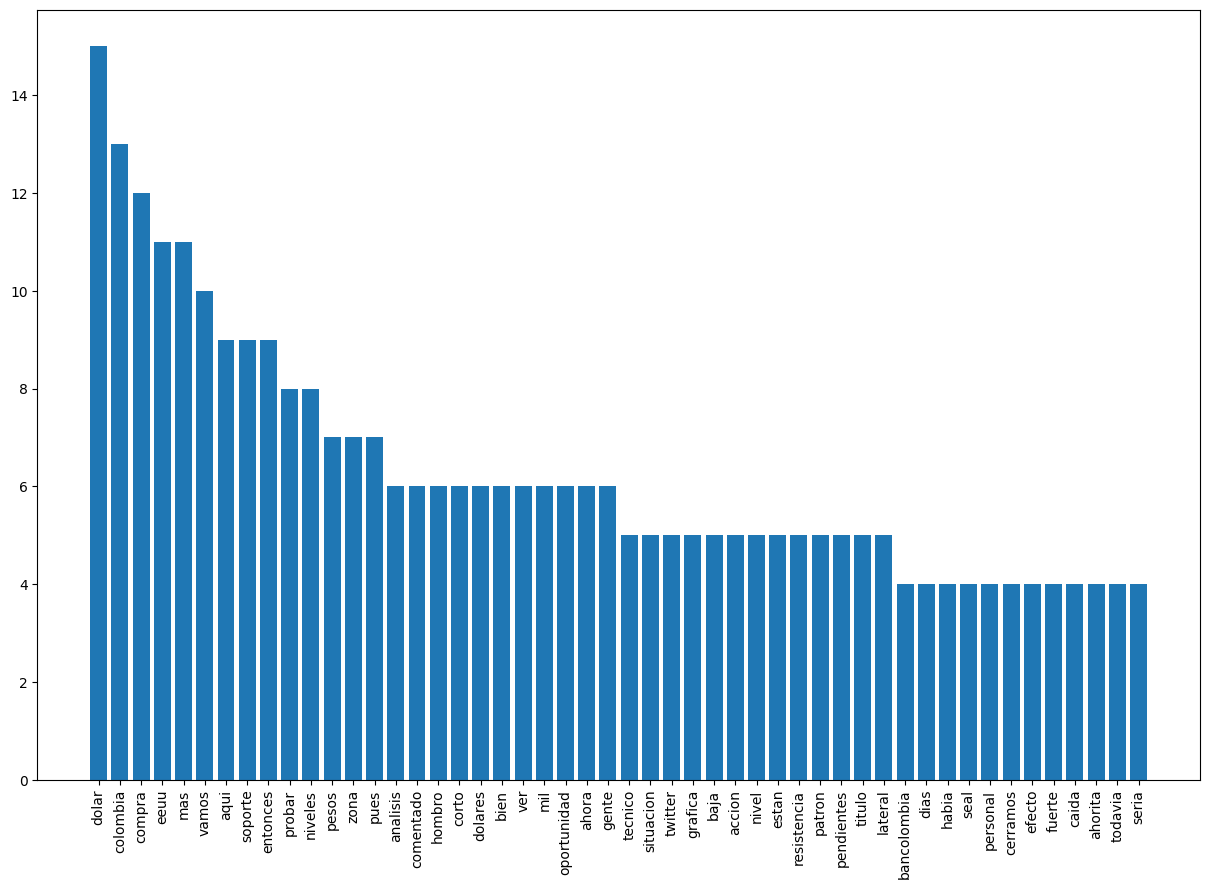

ARENA ALFA -2019
Size BoW= 1719


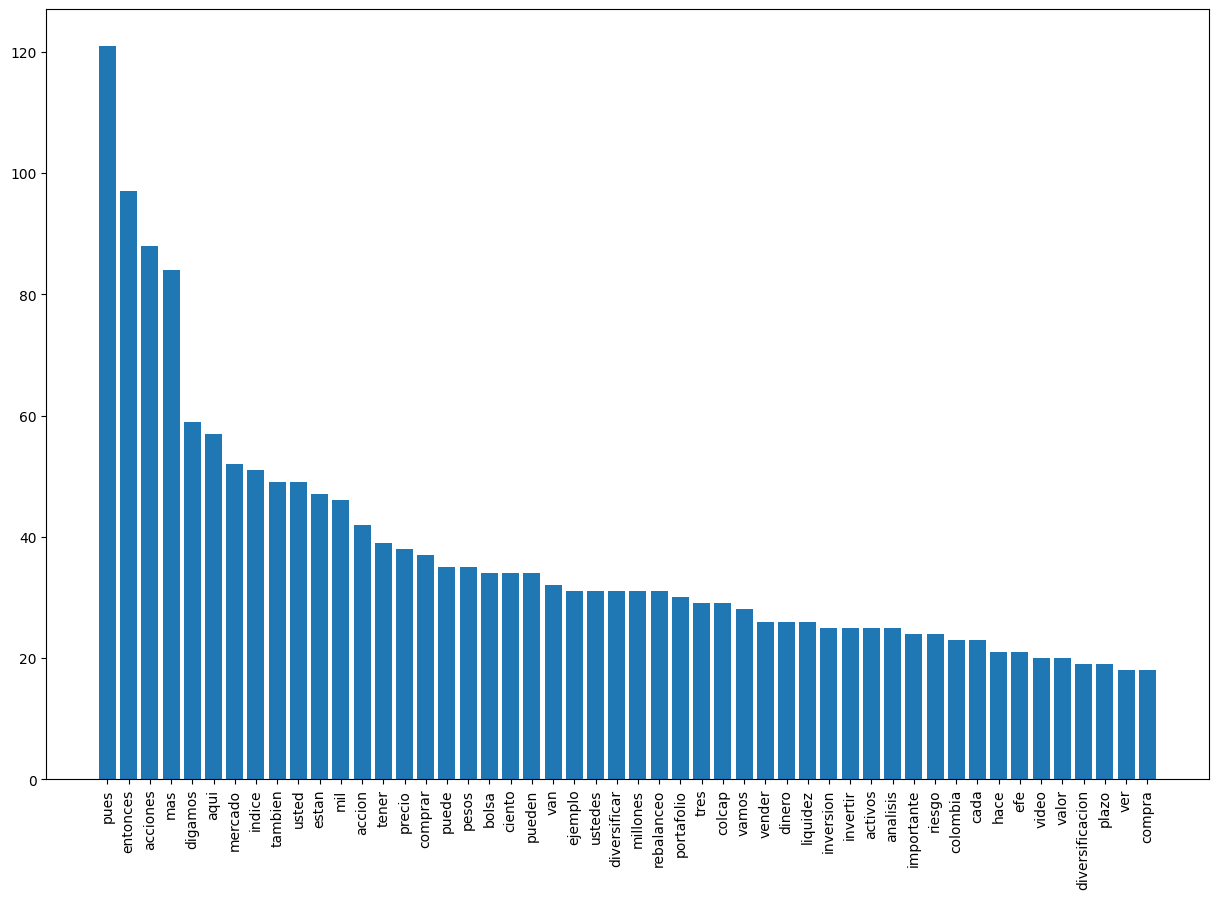

ARENA ALFA -2020
Size BoW= 8120


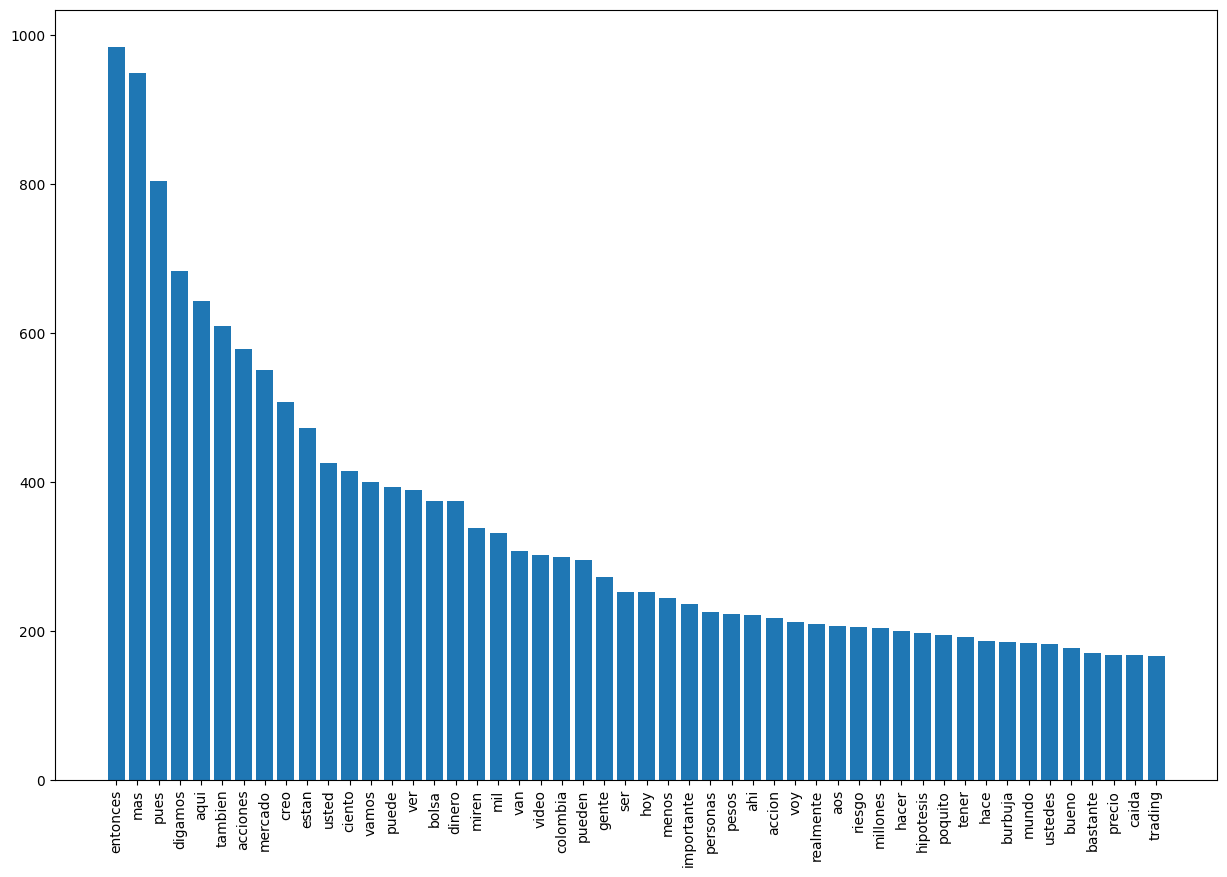

ARENA ALFA -2021
Size BoW= 7947


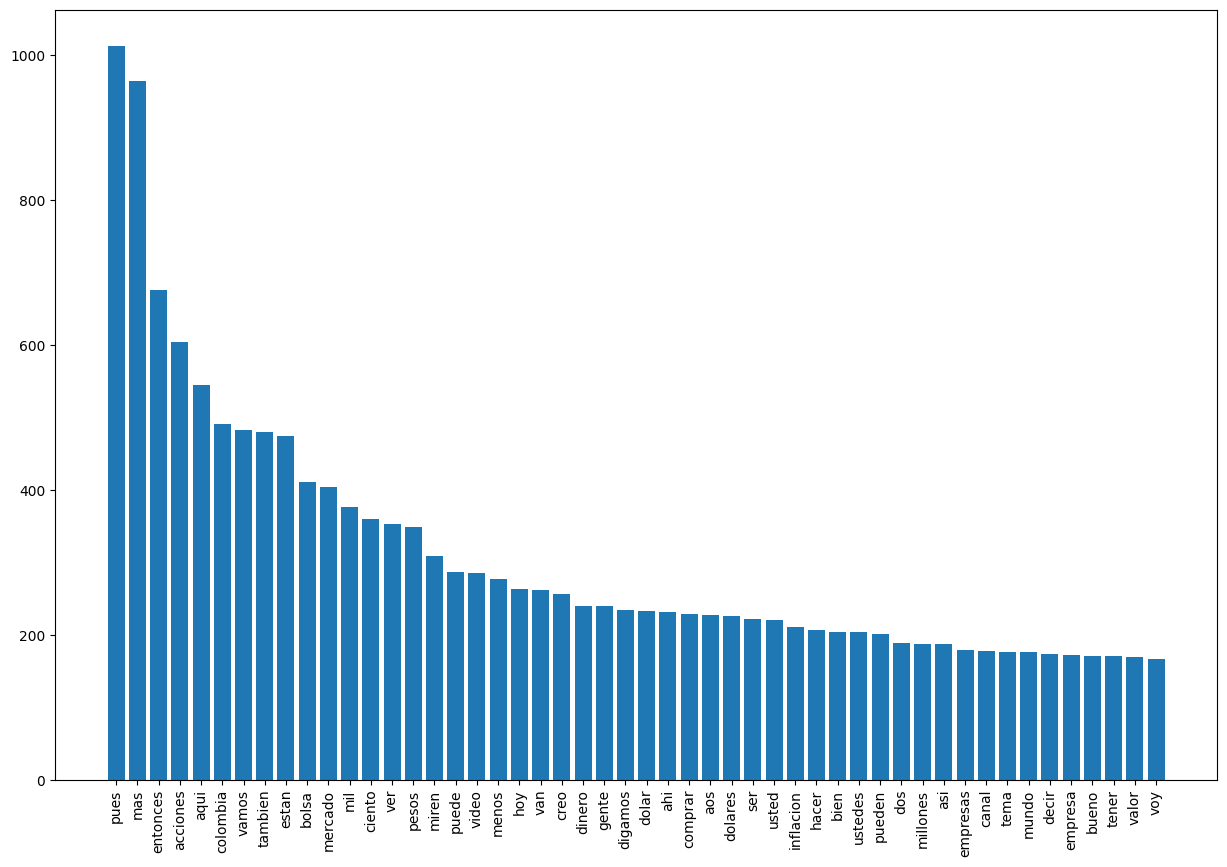

ARENA ALFA -2022
Size BoW= 8140


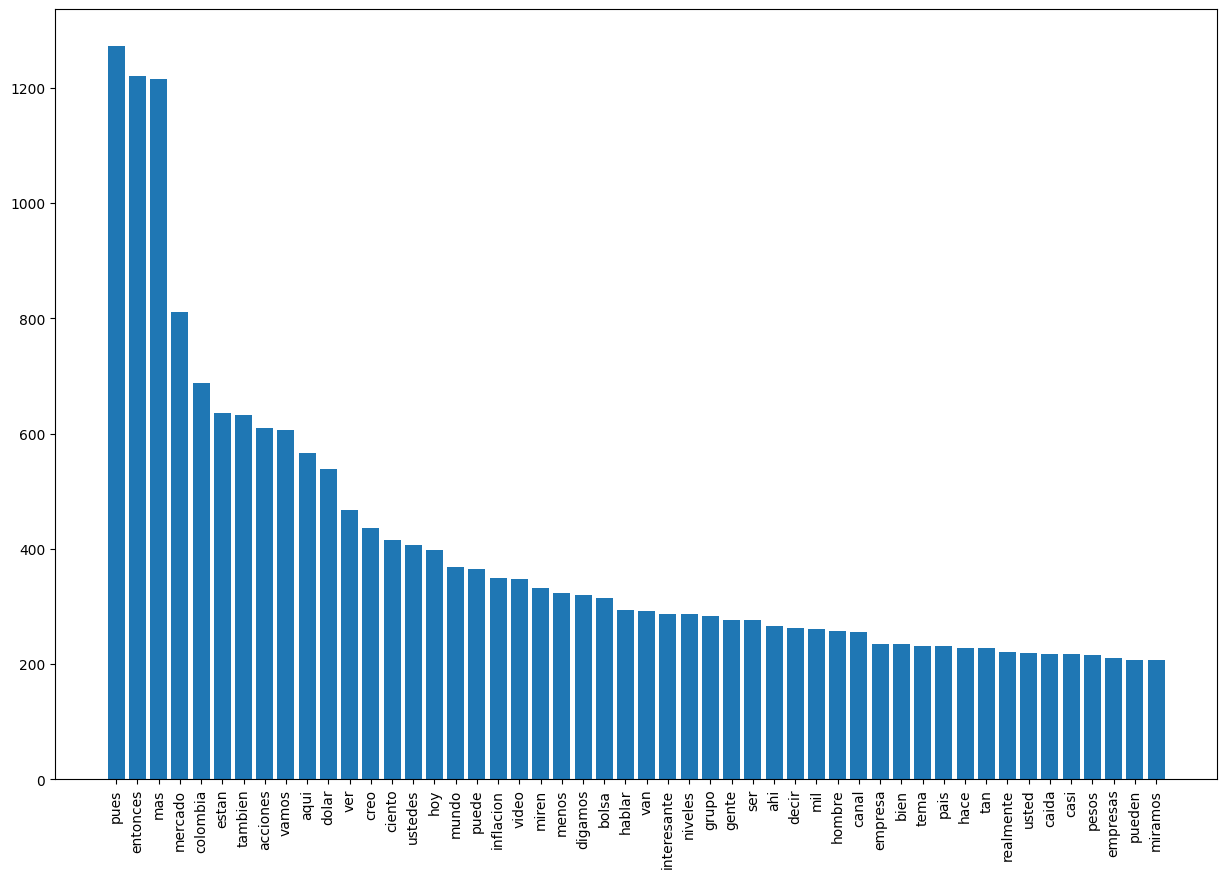

ARENA ALFA -2023
Size BoW= 7754


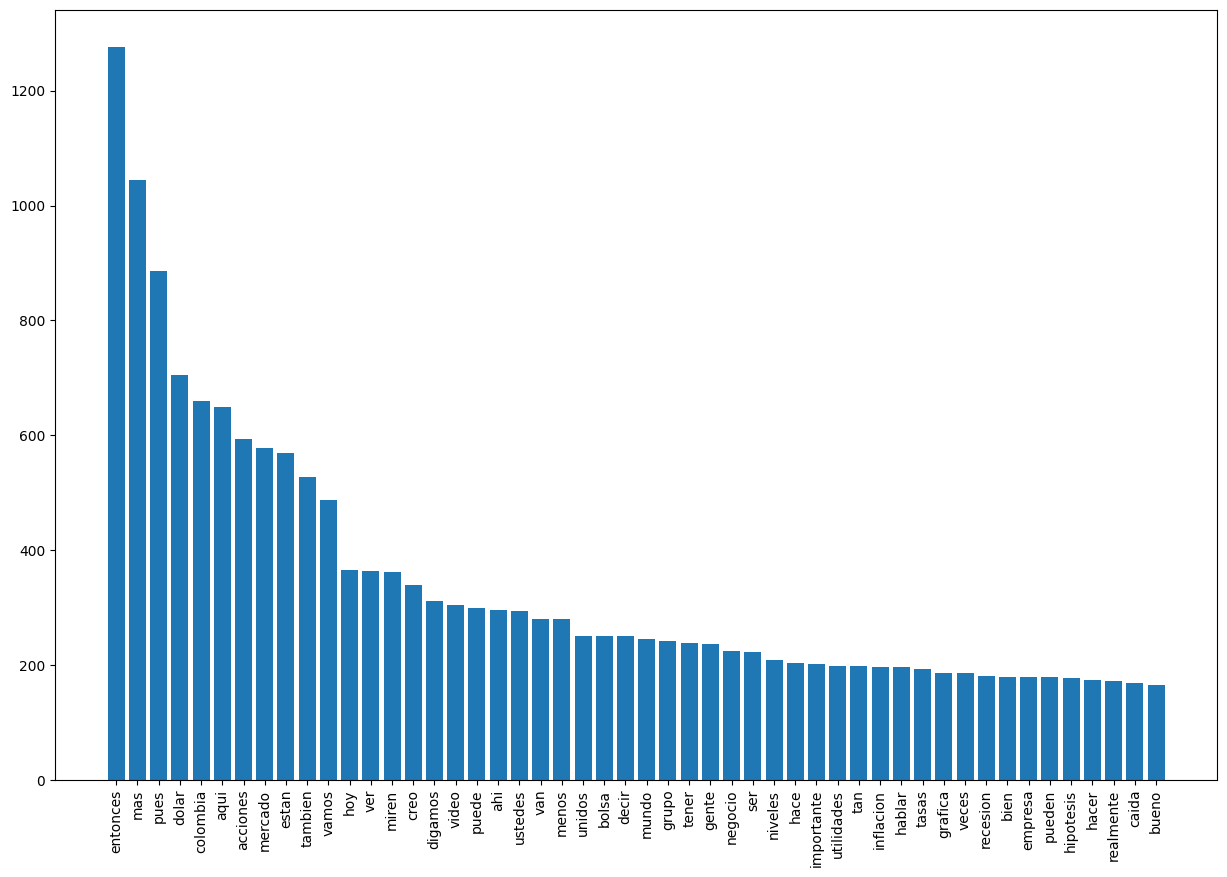

ARENA ALFA -2024
Size BoW= 3761


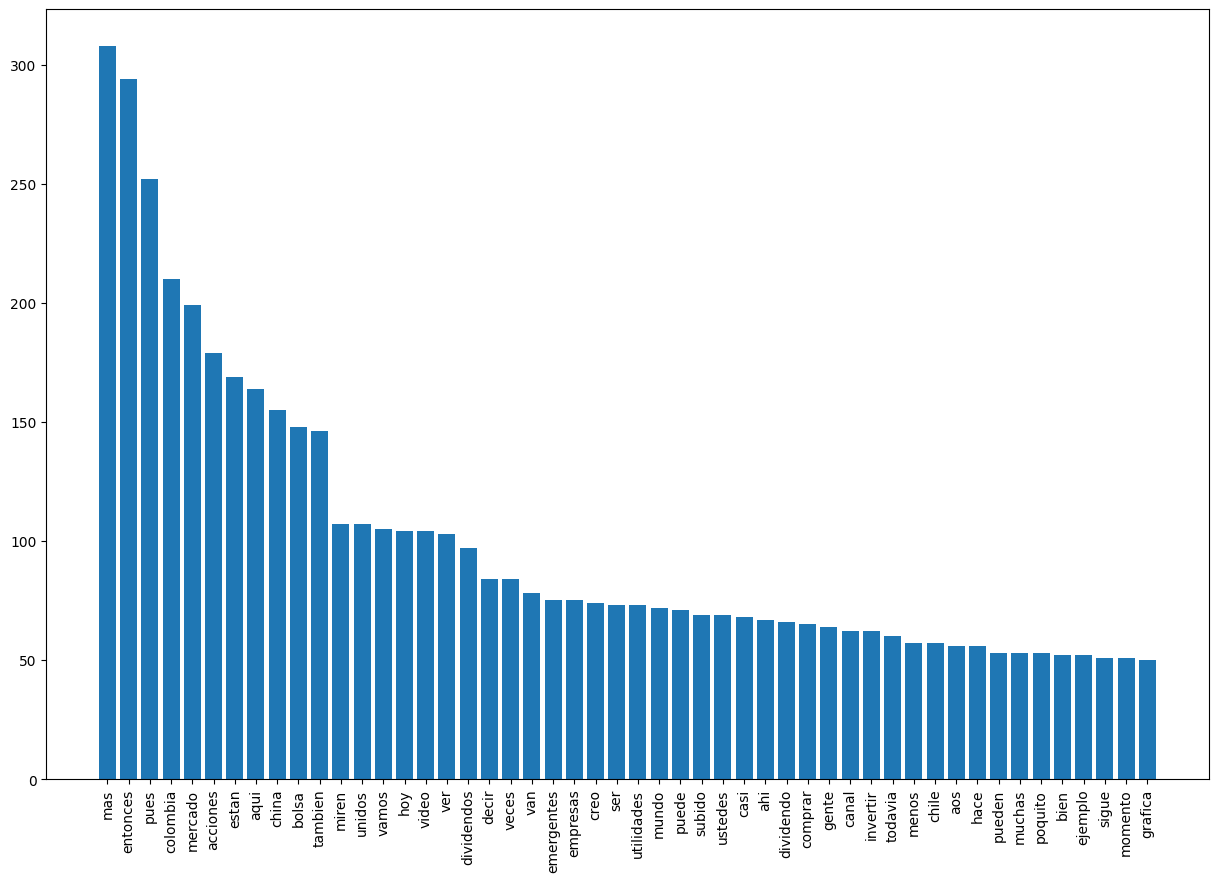

Bitcoin hoy-2021
Size BoW= 11535


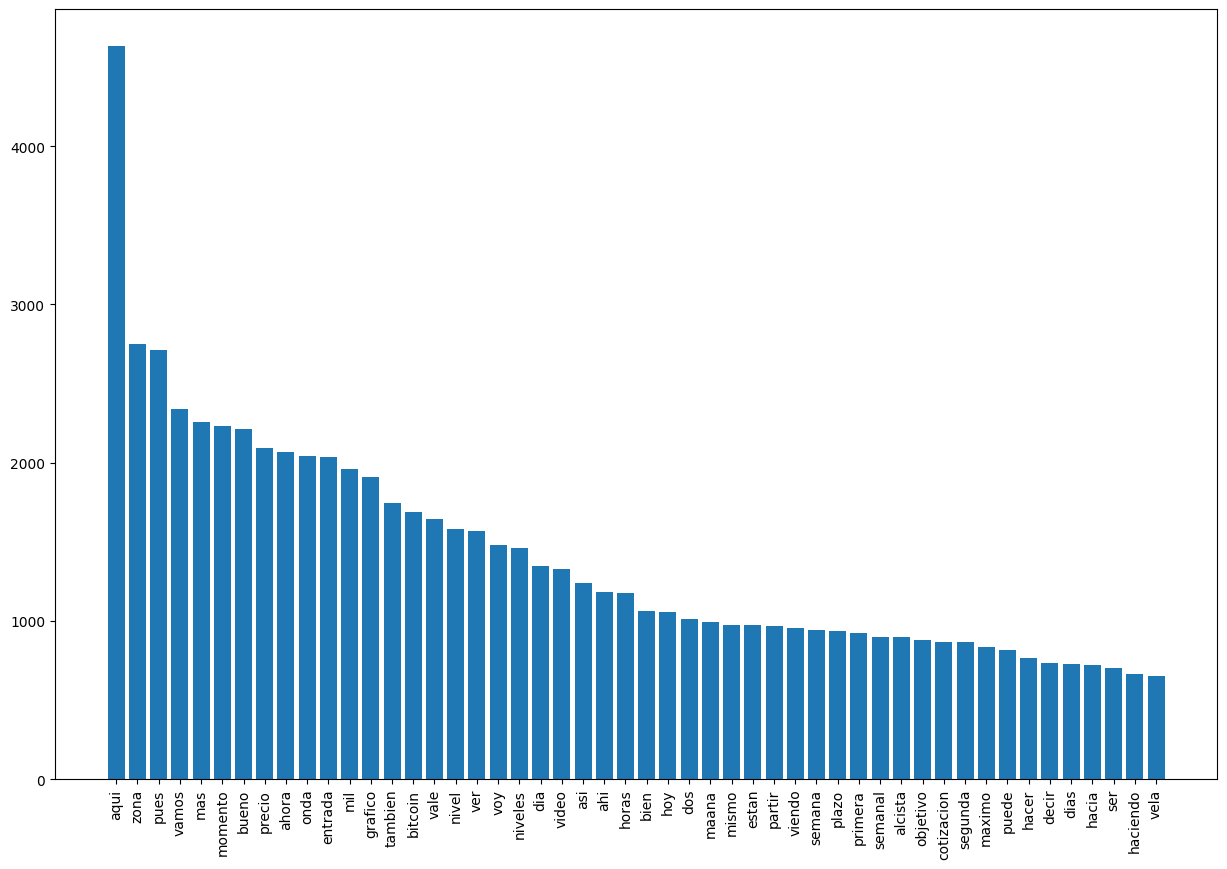

Bitcoin hoy-2022
Size BoW= 17946


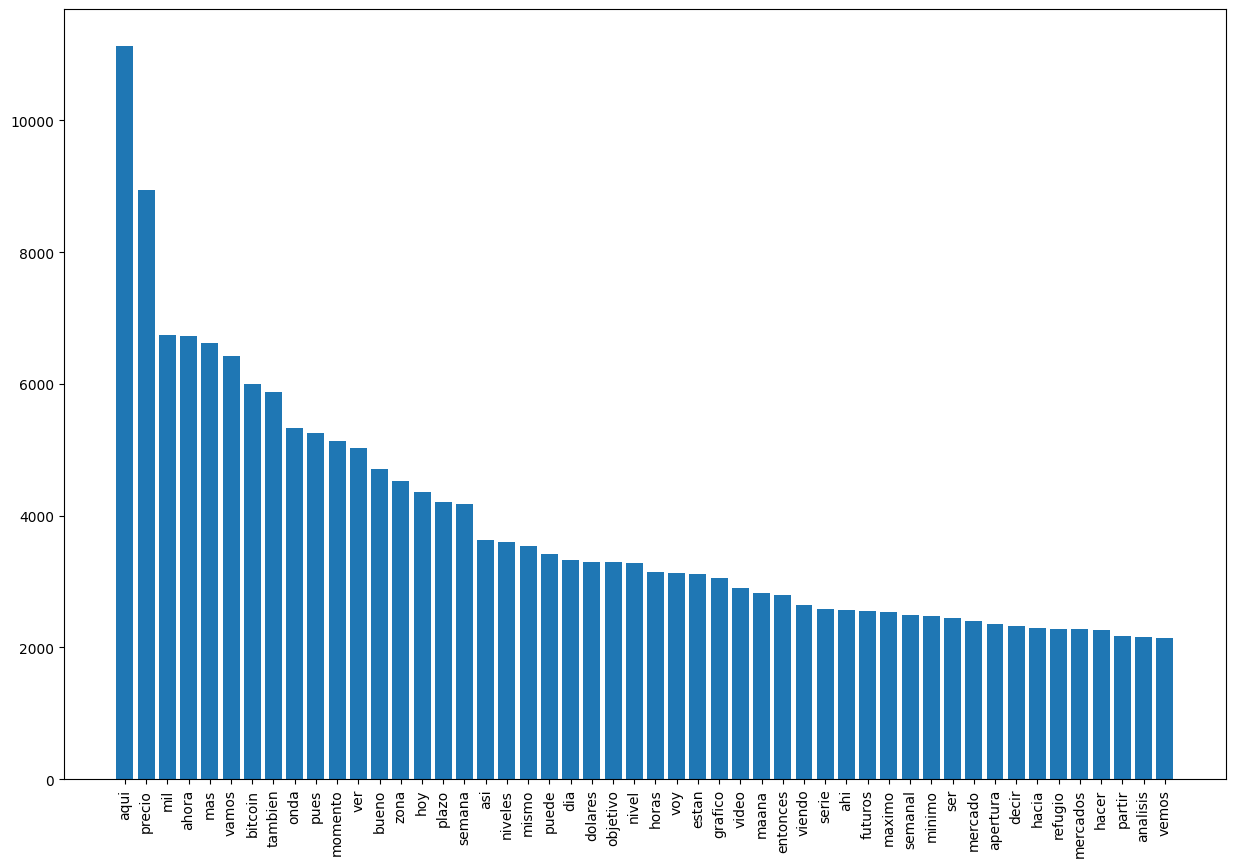

Bitcoin hoy-2023
Size BoW= 16640


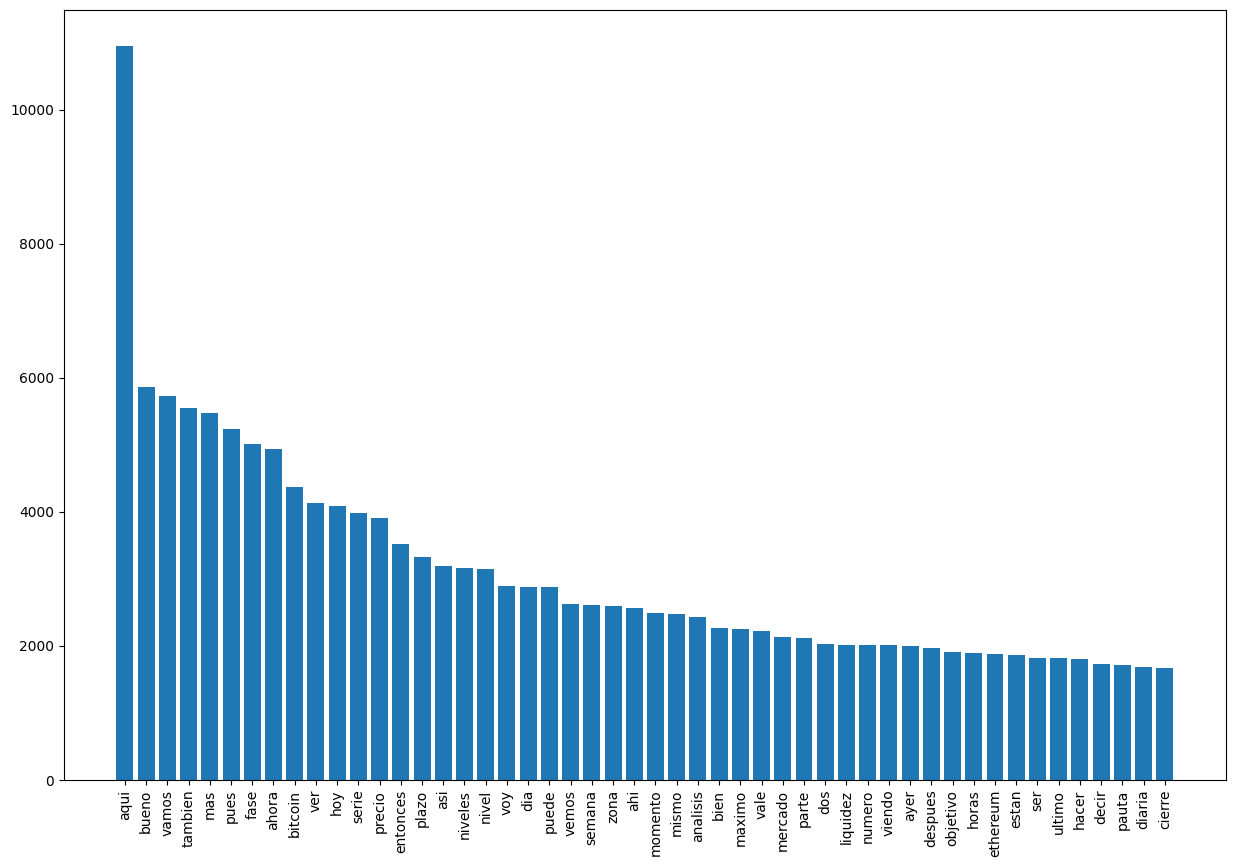

Bitcoin hoy-2024
Size BoW= 9178


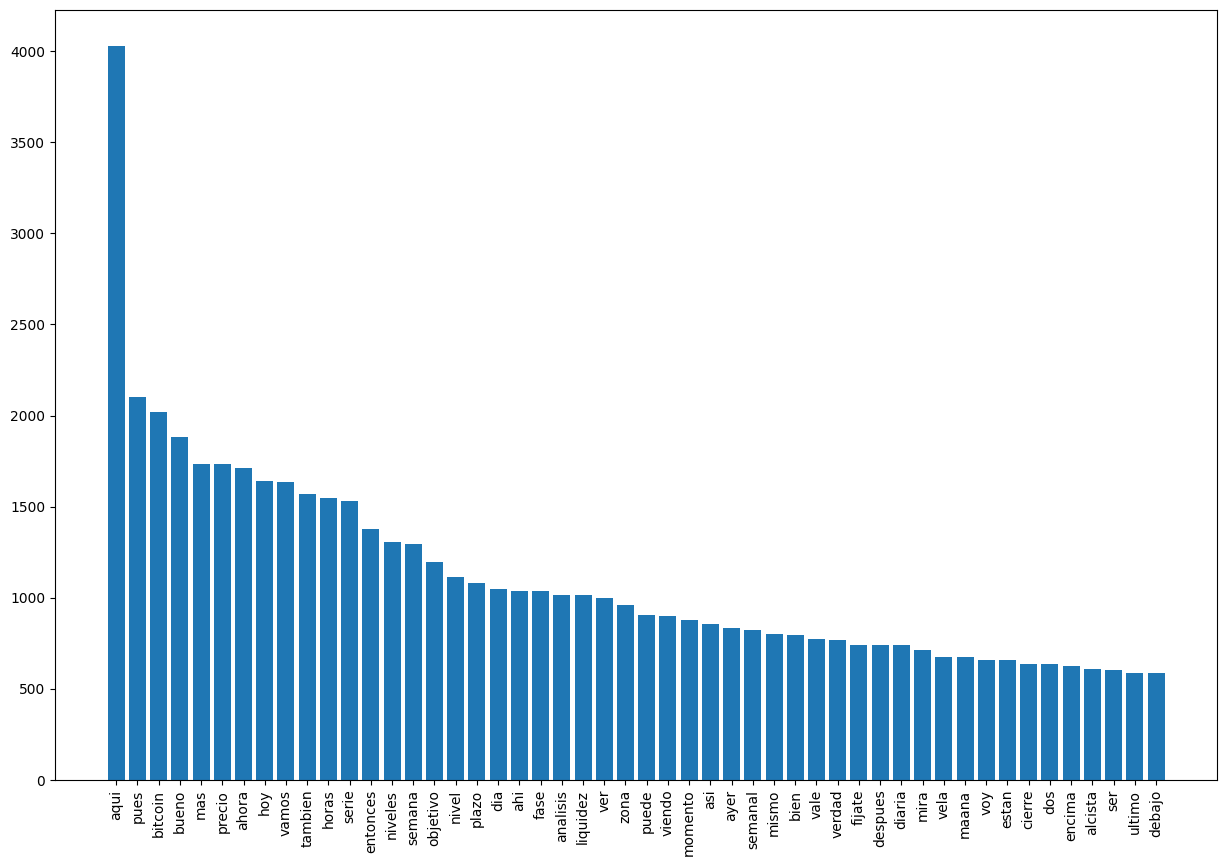

Bolsas hoy-2023
Size BoW= 11798


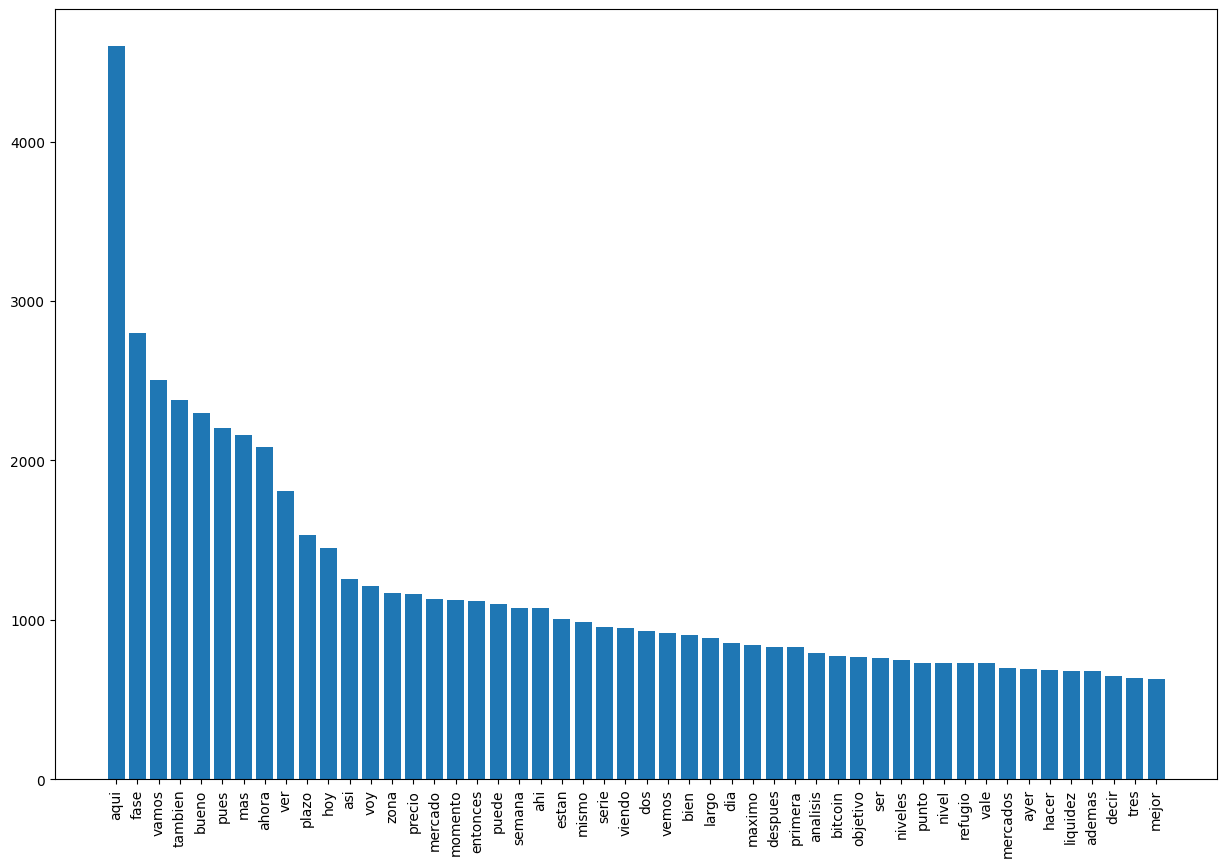

Bolsas hoy-2024
Size BoW= 12358


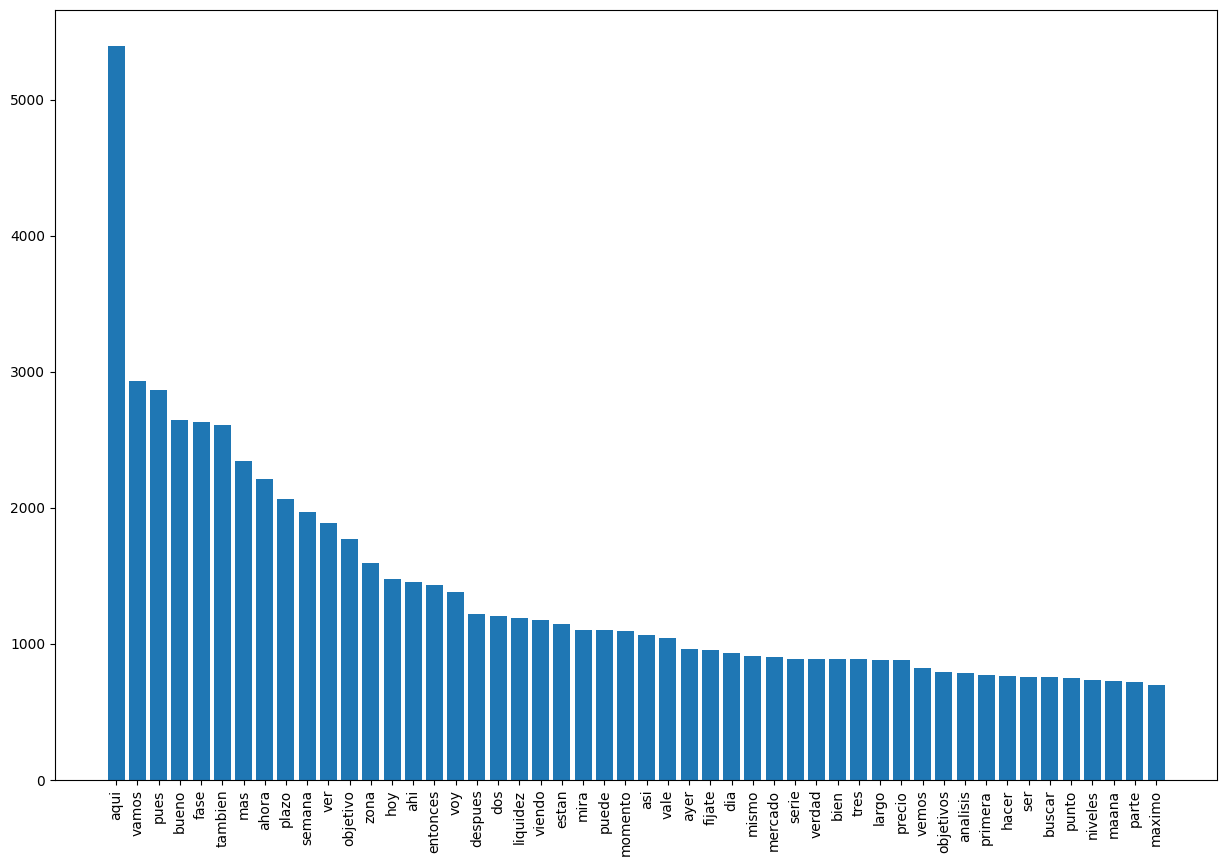

Memorias de Tiburón-2021
Size BoW= 2920


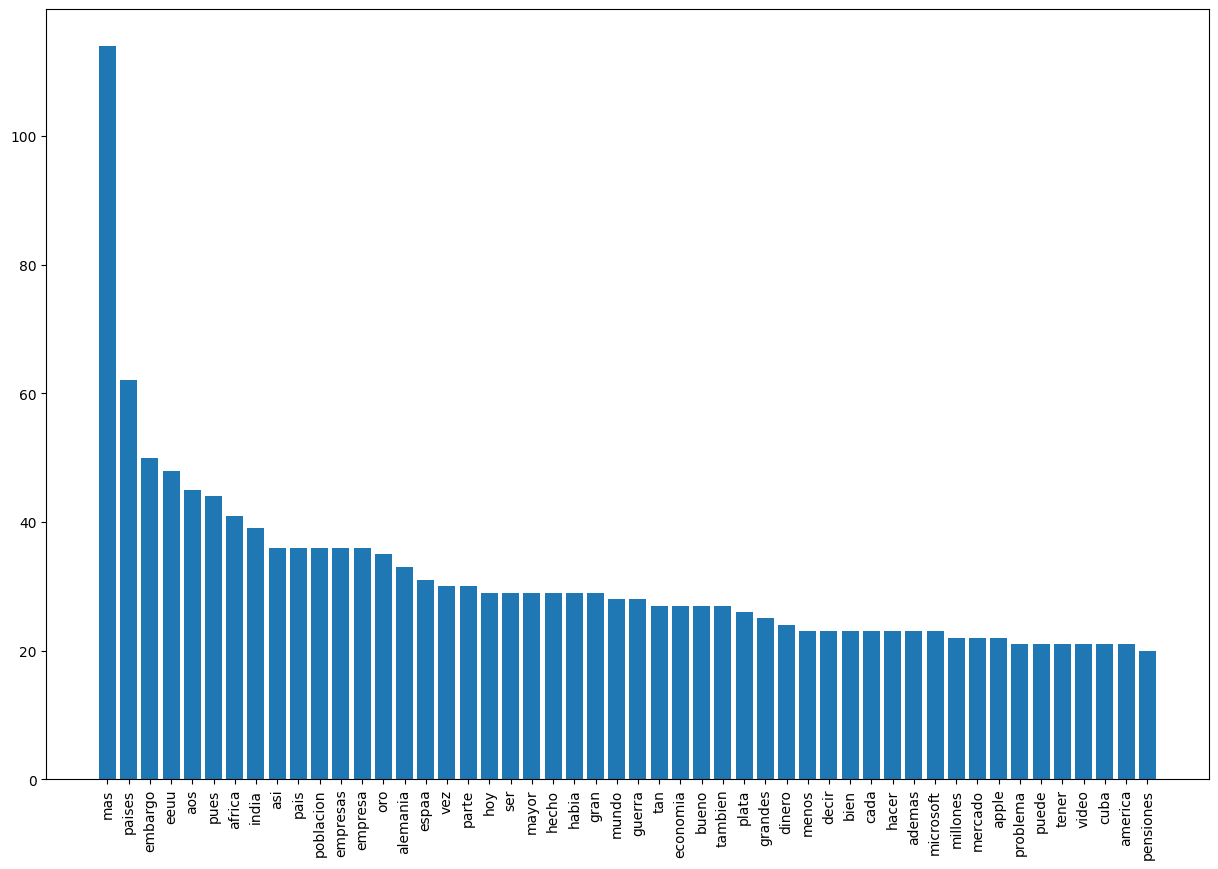

Memorias de Tiburón-2022
Size BoW= 5173


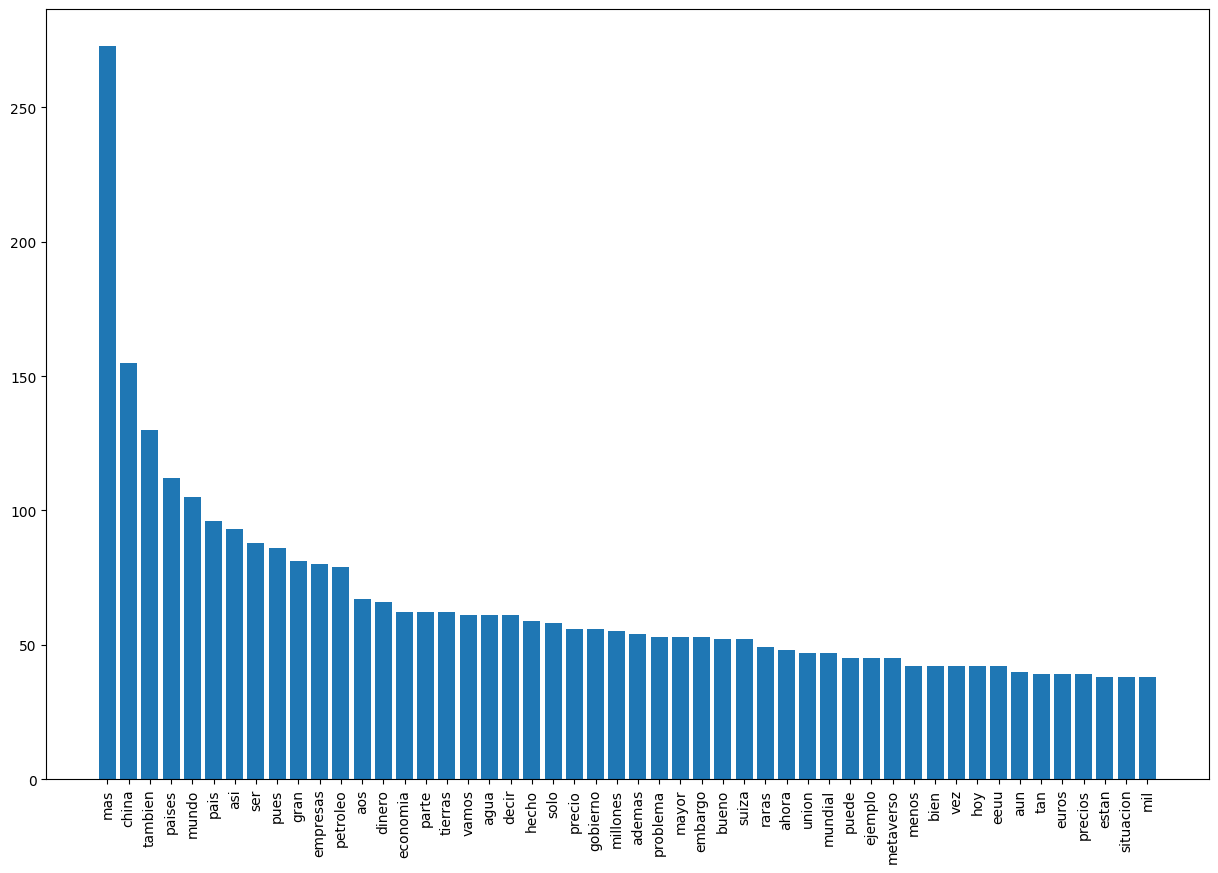

Memorias de Tiburón-2023
Size BoW= 9418


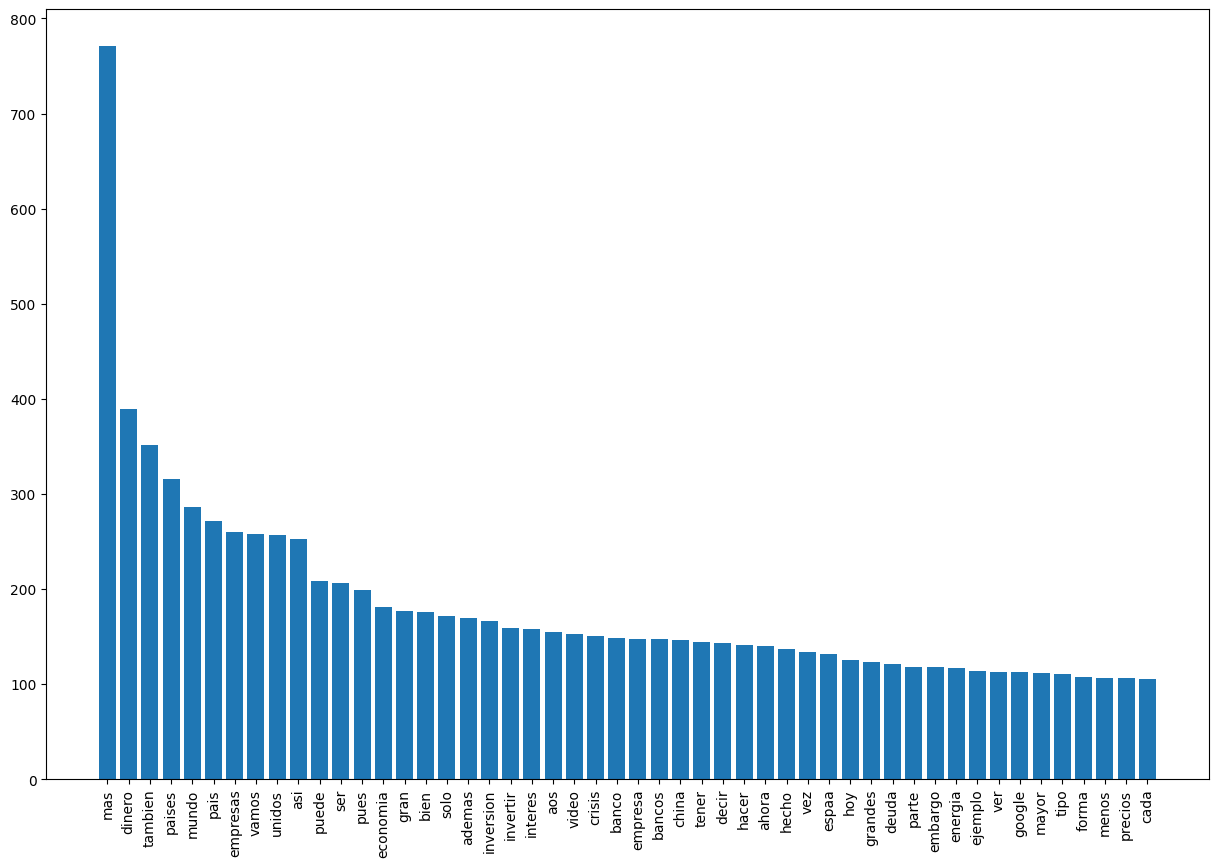

Memorias de Tiburón-2024
Size BoW= 6232


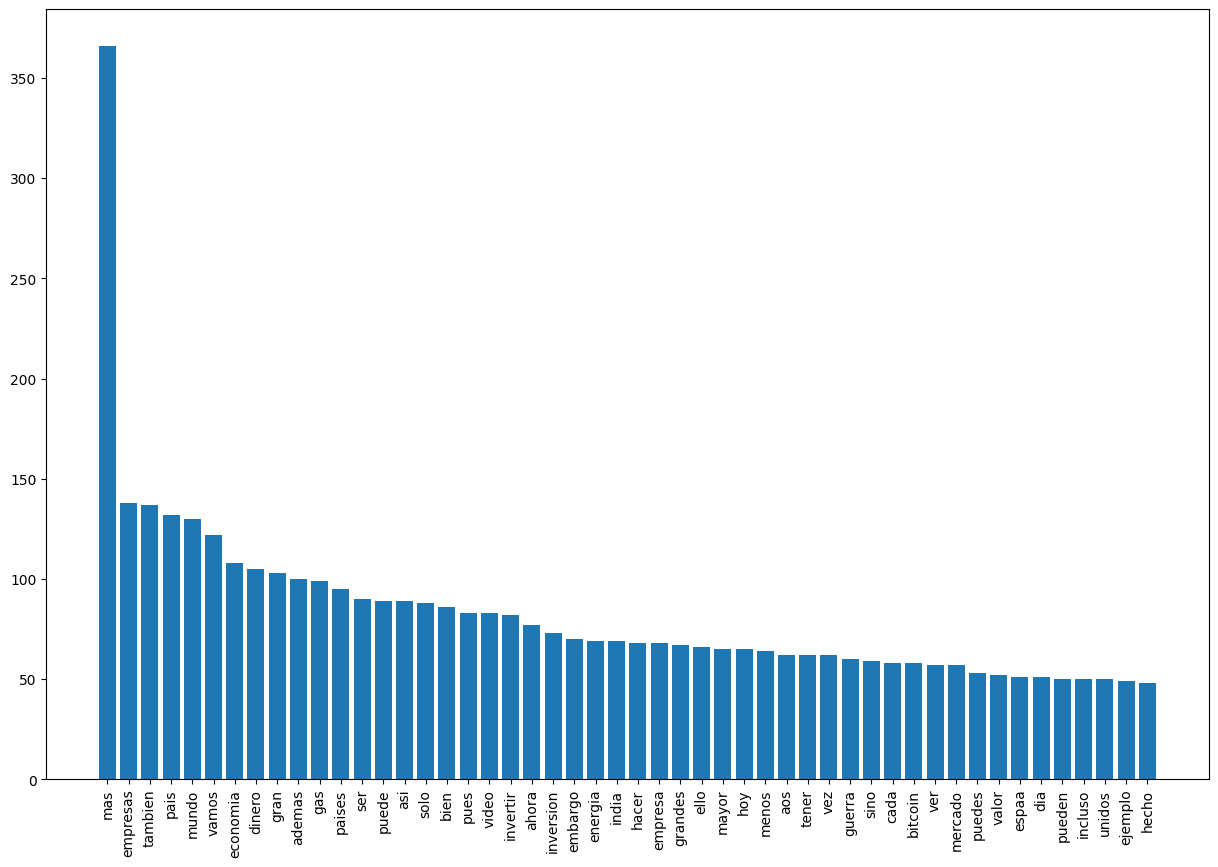

USACRYPTONOTICIAS-2021
Size BoW= 9638


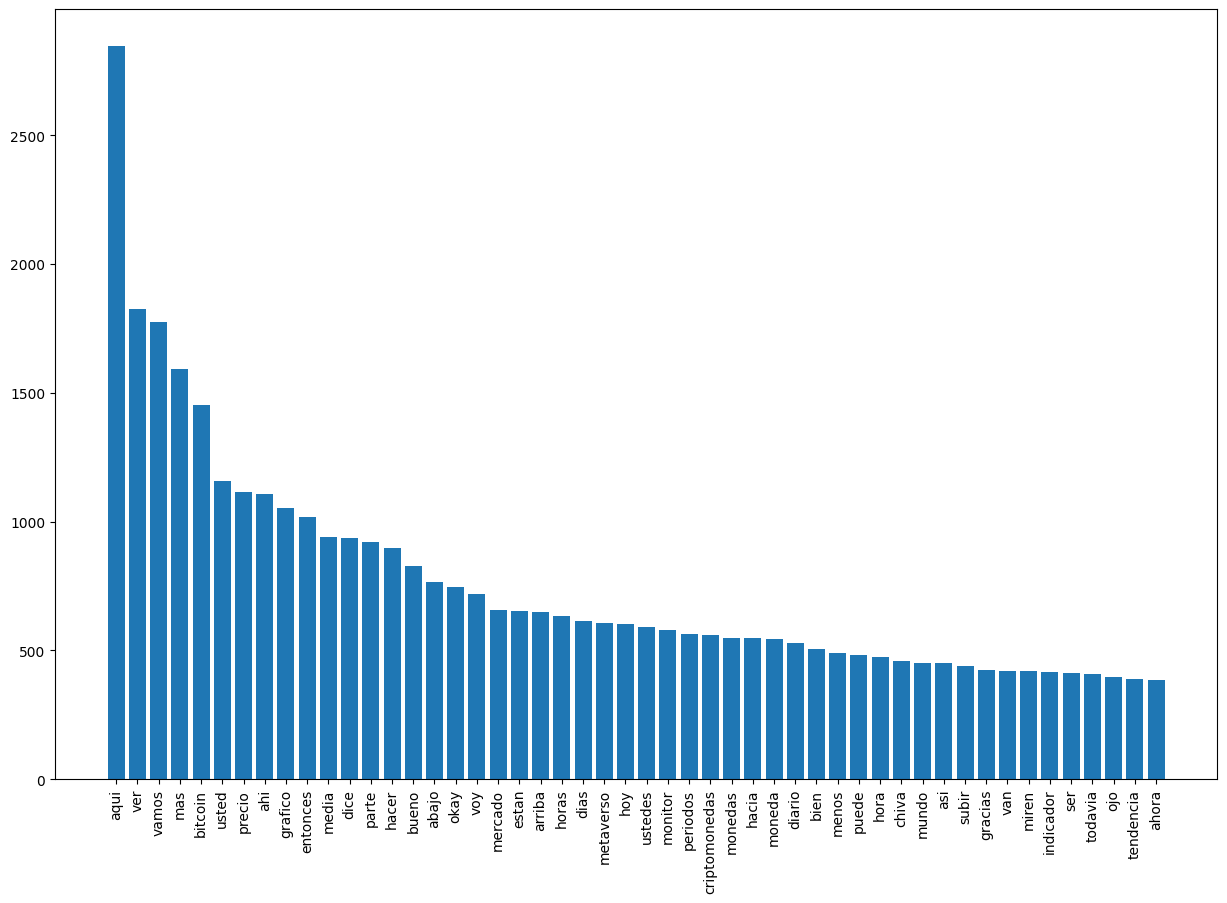

USACRYPTONOTICIAS-2022
Size BoW= 36340


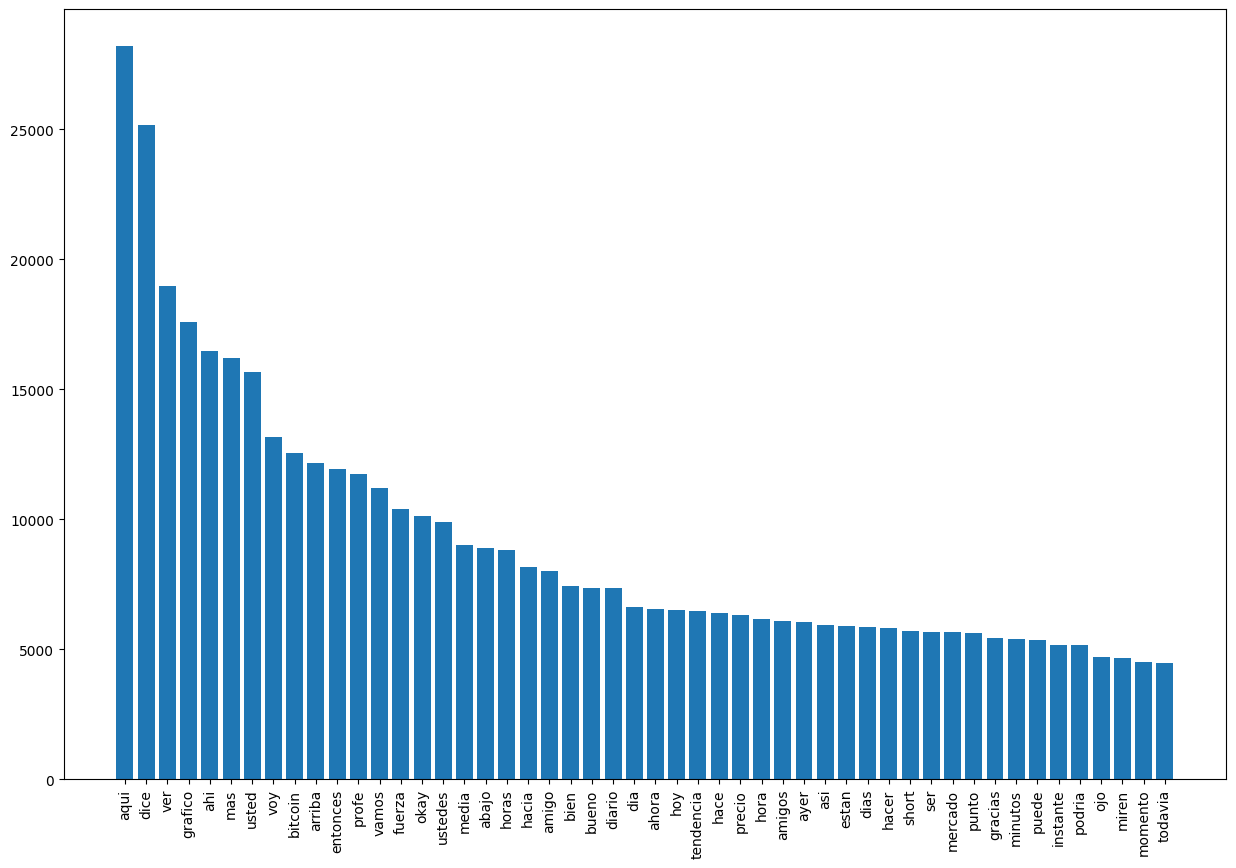

USACRYPTONOTICIAS-2023
Size BoW= 49168


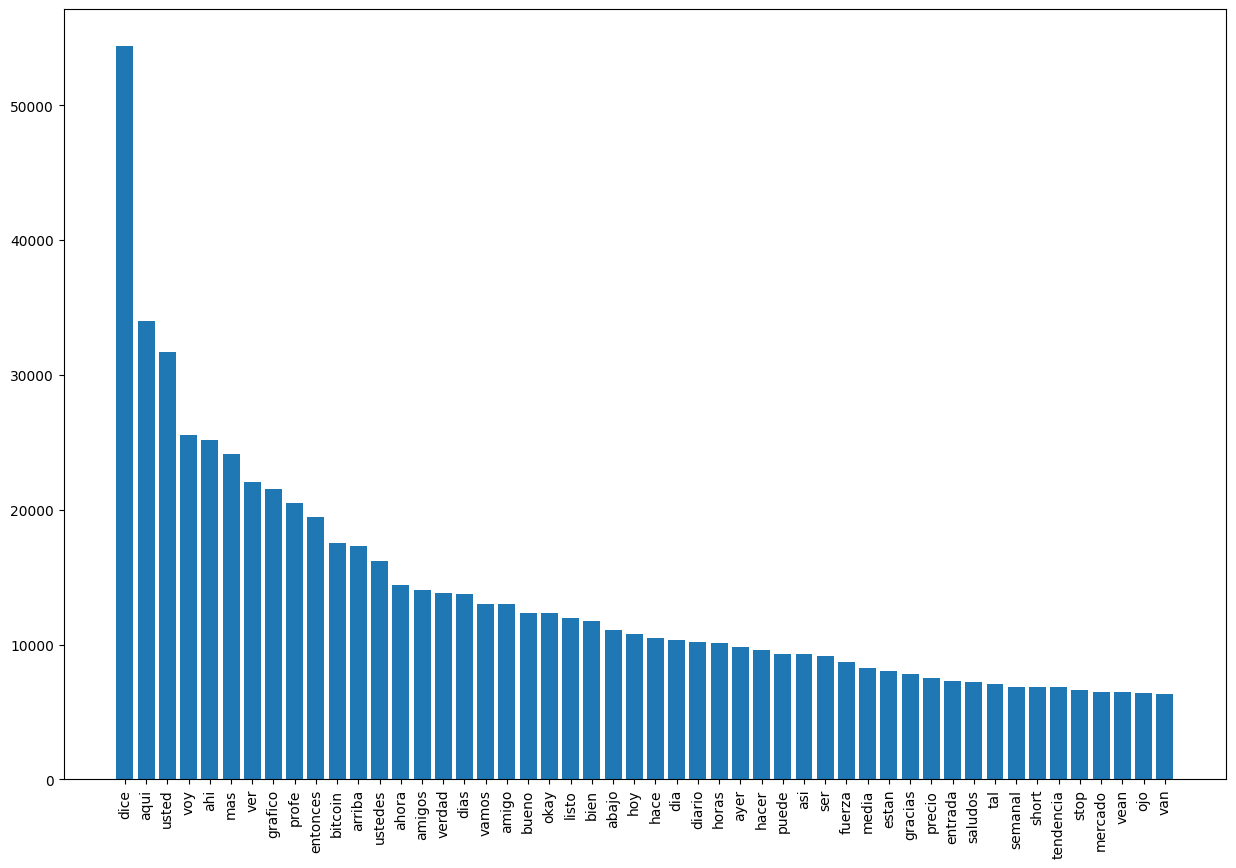

USACRYPTONOTICIAS-2024
Size BoW= 38302


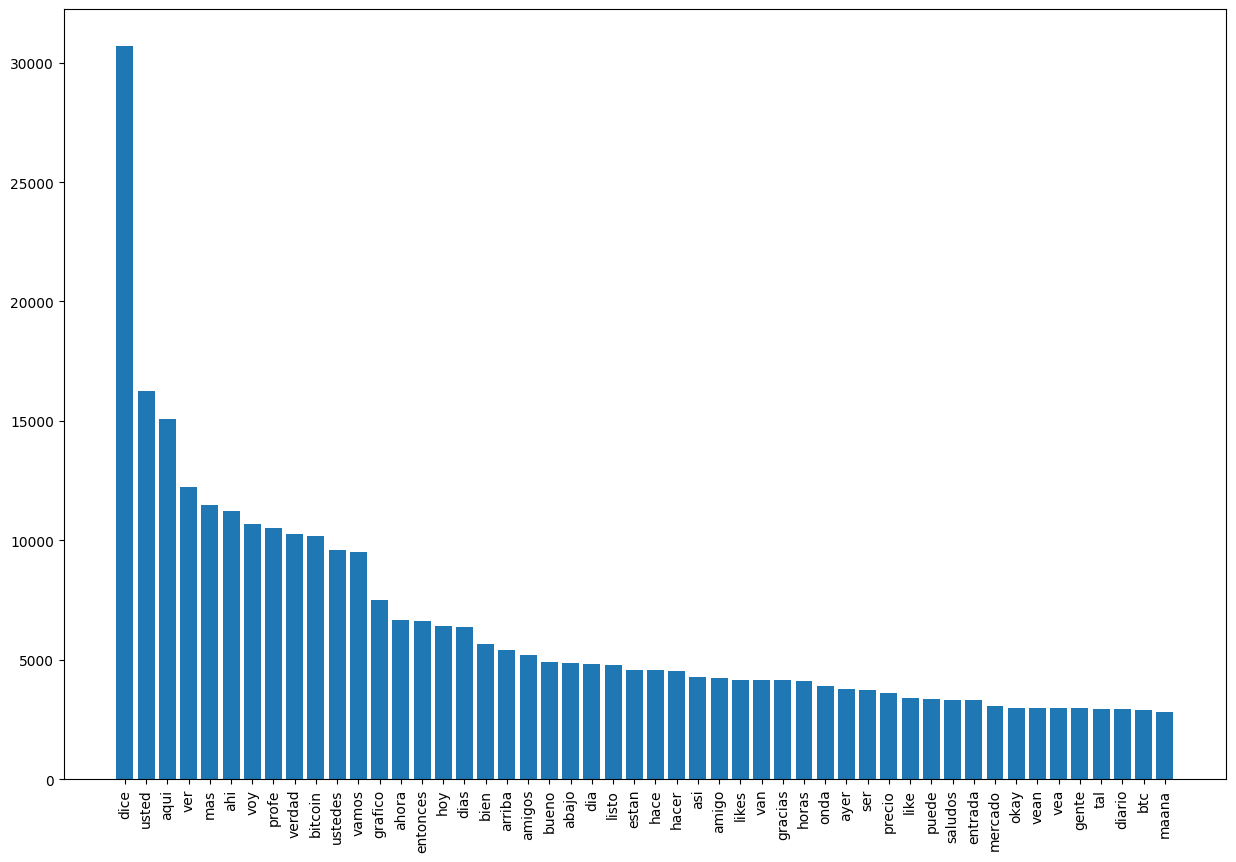

In [63]:
for _,row in grouped_channel_df.iterrows():
    lista_tokens_video=row['tokenized_text']
    #all_tokens = unir_tokens_from_lista(lista_tokens_video)
    prepro_tokens = preprocesamiento_and_stopwords(lista_tokens_video)
    #prepro_tokens = preprocesamiento_lematizacion_stemming(prepro_tokens)
    print(f"{row['chanel_name']}-{row['year']}")
    analisis_grafico(prepro_tokens,50)